In [514]:
## Importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [515]:
#Importing the available dataset

train=pd.read_csv("Train_cars.csv")
test=pd.read_csv("Test_cars.csv")

In [516]:
## combining the datasets.

comb=pd.concat([train,test])

In [517]:
train.shape, test.shape, comb.shape

((22500, 13), (52500, 12), (75000, 13))

In [518]:
comb.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [519]:
## Checking for the null values in the dataset.

comb.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                341
Engine                 106
Power                  317
Seats                  338
New_Price            61934
Price                52500
dtype: int64

In [520]:
train.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                 92
Engine                  37
Power                   85
Seats                   92
New_Price            18619
Price                    0
dtype: int64

In [521]:
test.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                249
Engine                  69
Power                  232
Seats                  246
New_Price            43315
dtype: int64

In [522]:
## checking for the % of missing values in each column

comb.isnull().sum()/len(comb)*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.454667
Engine                0.141333
Power                 0.422667
Seats                 0.450667
New_Price            82.578667
Price                70.000000
dtype: float64

In [523]:
## We note that the New_Price column has 82% of missing values, but w.r.t the price prediction and domain knowledge
## it is an important feature, thus we would try to see the relevant relation available in the data set and try to 
## Fill the missing values.

In [524]:
comb.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [525]:
## Checking for the numerical columns and categorical columns in the dataset.

comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 0 to 52499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               75000 non-null  object 
 1   Location           75000 non-null  object 
 2   Year               75000 non-null  int64  
 3   Kilometers_Driven  75000 non-null  int64  
 4   Fuel_Type          75000 non-null  object 
 5   Transmission       75000 non-null  object 
 6   Owner_Type         75000 non-null  object 
 7   Mileage            74659 non-null  object 
 8   Engine             74894 non-null  object 
 9   Power              74683 non-null  object 
 10  Seats              74662 non-null  float64
 11  New_Price          13066 non-null  object 
 12  Price              22500 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 8.0+ MB


In [526]:
num=comb.select_dtypes(include=np.number)
num

,Year,Kilometers_Driven,Seats,Price
0,2012,33715,5.0,25.53
1,2013,73977,4.0,4.58
2,2007,16460,5.0,2.37
3,2009,35048,5.0,1.20
4,2013,41656,7.0,33.04
...,...,...,...,...
52495,2014,59533,8.0,NaN
52496,2017,56122,5.0,NaN
52497,2012,57365,5.0,NaN
52498,2012,33307,5.0,NaN


In [527]:
comb.describe().T

## Also we observe 4 numerical columns in the data
## Descriptive statistics of the numerical columns

,count,mean,std,min,25%,50%,75%,max
Year,75000.0,2011.821053,2.685890,2000.00,2010.00,2012.00,2014.00,2018.0
Kilometers_Driven,75000.0,48859.175787,21583.406967,171.00,35710.75,47861.00,59548.25,255022.0
Seats,74662.0,5.356205,0.847848,4.00,5.00,5.00,5.00,8.0
Price,22500.0,6.359158,7.302764,0.44,2.29,3.51,6.59,71.6


In [528]:
cat=comb.select_dtypes(include="object")

cat
## we note 9 categorical columns in the data

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
0,Maruti 800 Std BSIII,Bangalore,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,43.65 Lakh
1,Honda City 1.5 V AT,Delhi,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,NaN
2,Honda CR-V RVi MT,Delhi,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,NaN
3,Skoda Yeti Ambition 4X2,Kolkata,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,NaN
4,Hyundai i10 Magna LPG,Coimbatore,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,13.26 Lakh
...,...,...,...,...,...,...,...,...,...
52495,Honda Mobilio S i DTEC,Kolkata,Diesel,Manual,First,16.09 kmpl,1248 CC,null bhp,NaN
52496,Toyota Etios Liva 1.2 G,Kochi,Diesel,Manual,First,12.6 kmpl,1591 CC,85.8 bhp,1.36 Cr
52497,Maruti Zen LX,Hyderabad,Diesel,Manual,First,22.0 kmpl,2993 CC,174.3 bhp,10.04 Lakh
52498,Toyota Innova 2.5 VX (Diesel) 7 Seater,Hyderabad,Diesel,Manual,First,10.98 kmpl,1995 CC,112 bhp,NaN


In [529]:
comb.select_dtypes(include="object").describe().T

## Descriptive stats of categorical column

,count,unique,top,freq
Name,75000,1515,Maruti Wagon R LXI CNG,449
Location,75000,11,Mumbai,14432
Fuel_Type,75000,5,Petrol,33678
Transmission,75000,2,Manual,60107
Owner_Type,75000,4,First,67452
Mileage,74659,442,26.6 km/kg,4212
Engine,74894,146,998 CC,7398
Power,74683,372,58.16 bhp,4550
New_Price,13066,540,8.61 Lakh,3354


In [530]:
## Checking for a relation between name column and New_Price column.

In [531]:
comb[["Name","New_Price"]]

,Name,New_Price
0,Maruti 800 Std BSIII,43.65 Lakh
1,Honda City 1.5 V AT,NaN
2,Honda CR-V RVi MT,NaN
3,Skoda Yeti Ambition 4X2,NaN
4,Hyundai i10 Magna LPG,13.26 Lakh
...,...,...
52495,Honda Mobilio S i DTEC,NaN
52496,Toyota Etios Liva 1.2 G,1.36 Cr
52497,Maruti Zen LX,10.04 Lakh
52498,Toyota Innova 2.5 VX (Diesel) 7 Seater,NaN


In [532]:
comb.Name.value_counts()

Maruti Wagon R LXI CNG                                  449
Honda City 1.5 S MT                                     430
Maruti Swift VDI                                        415
Hyundai i10 Sportz                                      374
BMW 3 Series 320d                                       370
                                                       ... 
Mercedes-Benz New C-Class C 200 Avantgarde Edition C      1
Volkswagen Ameo 1.2 MPI Highline Plus 16                  1
Mercedes-Benz GLA Class 200 d Style                       1
Hyundai i20 Active S Diesel                               1
Maruti Ertiga VDI Limited Edition                         1
Name: Name, Length: 1515, dtype: int64

In [533]:
comb.groupby("New_Price")["Name"].value_counts()

New_Price   Name                                                   
1 Cr        Honda BRV i-VTEC V CVT                                     2
            Ford Endeavour 4x2 XLT Limited Edition                     1
            Honda Amaze S i-Dtech                                      1
            Honda Jazz 1.5 S i DTEC                                    1
            Mercedes-Benz E-Class 2009-2013 E350 Petrol                1
                                                                      ..
99.92 Lakh  Mercedes-Benz New C-Class C 220CDIBE Avantgarde Command    1
            Renault Duster 85PS Diesel RxE                             1
            Toyota Innova 2.5 V Diesel 8-seater                        1
            Toyota Prius 2009-2016 Z4                                  1
            Volkswagen Tiguan 2.0 TDI Highline                         1
Name: Name, Length: 9872, dtype: int64

In [534]:
comb.loc[comb.New_Price.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
5,Hyundai i20 Asta 1.4 CRDi,Pune,2011,58764,Diesel,Manual,First,20.4 kmpl,1956 CC,98.6 bhp,7.0,NaN,8.24
6,Mercedes-Benz E-Class 2009-2013 E200 CGI Blue ...,Hyderabad,2010,47655,Diesel,Automatic,First,25.44 kmpl,2982 CC,57.5 bhp,7.0,NaN,11.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52493,Ford Fiesta 1.4 Duratec EXI,Mumbai,2005,52595,Petrol,Manual,First,18.5 kmpl,1086 CC,78.9 bhp,5.0,NaN,NaN
52494,Volkswagen Vento 1.6 Highline,Mumbai,2009,49088,CNG,Manual,First,17.8 kmpl,1396 CC,335.3 bhp,5.0,NaN,NaN
52495,Honda Mobilio S i DTEC,Kolkata,2014,59533,Diesel,Manual,First,16.09 kmpl,1248 CC,null bhp,8.0,NaN,NaN
52498,Toyota Innova 2.5 VX (Diesel) 7 Seater,Hyderabad,2012,33307,Diesel,Manual,First,10.98 kmpl,1995 CC,112 bhp,5.0,NaN,NaN


In [535]:
comb[["Name","Engine","New_Price"]].value_counts()

Name                                  Engine   New_Price 
Hyundai Grand i10 1.2 Kappa Magna     1498 CC  8.61 Lakh     27
                                      1995 CC  8.61 Lakh     17
Ford Ecosport 1.5 Ti VCT MT Titanium  1498 CC  8.61 Lakh     11
Maruti Celerio VXI AT                 1995 CC  8.61 Lakh      9
Nissan Micra XV CVT                   1498 CC  8.61 Lakh      9
                                                             ..
Hyundai Santa Fe 4x4 AT               72 CC    8.56 Lakh      1
Hyundai Santro D Lite                 1388 CC  13.72 Lakh     1
                                      1498 CC  7.36 Lakh      1
Hyundai Santro DX                     2755 CC  9.55 Lakh      1
Volvo XC90 2007-2015 D5 AWD           2446 CC  10.94 Lakh     1
Length: 12264, dtype: int64

In [536]:
comb["Engine"].str.split()

0        [1248, CC]
1        [2993, CC]
2        [1599, CC]
3        [1196, CC]
4        [1999, CC]
            ...    
52495    [1248, CC]
52496    [1591, CC]
52497    [2993, CC]
52498    [1995, CC]
52499    [1798, CC]
Name: Engine, Length: 75000, dtype: object

In [537]:
# comb["Engine"]= comb["Engine"].str.strip(" CC").astype(float)

In [538]:
# comb.groupby("Name")["Engine"].mean()

In [539]:
comb.loc[comb.New_Price.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
5,Hyundai i20 Asta 1.4 CRDi,Pune,2011,58764,Diesel,Manual,First,20.4 kmpl,1956 CC,98.6 bhp,7.0,NaN,8.24
6,Mercedes-Benz E-Class 2009-2013 E200 CGI Blue ...,Hyderabad,2010,47655,Diesel,Automatic,First,25.44 kmpl,2982 CC,57.5 bhp,7.0,NaN,11.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52493,Ford Fiesta 1.4 Duratec EXI,Mumbai,2005,52595,Petrol,Manual,First,18.5 kmpl,1086 CC,78.9 bhp,5.0,NaN,NaN
52494,Volkswagen Vento 1.6 Highline,Mumbai,2009,49088,CNG,Manual,First,17.8 kmpl,1396 CC,335.3 bhp,5.0,NaN,NaN
52495,Honda Mobilio S i DTEC,Kolkata,2014,59533,Diesel,Manual,First,16.09 kmpl,1248 CC,null bhp,8.0,NaN,NaN
52498,Toyota Innova 2.5 VX (Diesel) 7 Seater,Hyderabad,2012,33307,Diesel,Manual,First,10.98 kmpl,1995 CC,112 bhp,5.0,NaN,NaN


In [540]:
## Using visualization to understand the pattern.

pd.crosstab(comb.New_Price, comb.Engine)

Engine,1047 CC,1061 CC,1086 CC,1120 CC,1150 CC,1172 CC,1186 CC,1193 CC,1194 CC,1196 CC,...,793 CC,796 CC,799 CC,814 CC,936 CC,970 CC,993 CC,995 CC,998 CC,999 CC
New_Price,,,,,,,,,,,,,,,,,,,,,
1 Cr,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1.02 Cr,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1.04 Cr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.06 Cr,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,2,0
1.13 Cr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92.79 Lakh,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
95.04 Lakh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95.13 Lakh,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0


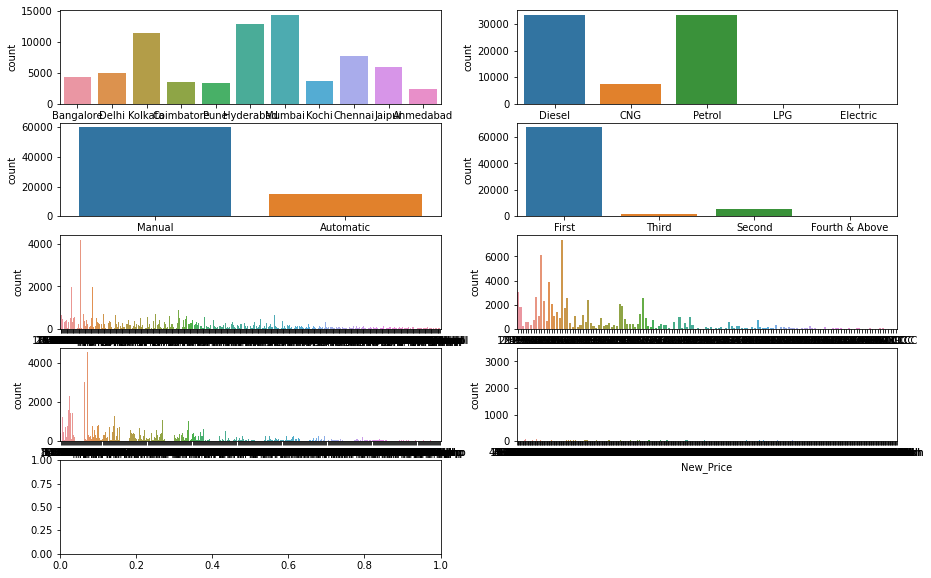

In [541]:
c=1
plt.figure(figsize=(15,10))
for i in cat:
    sns.countplot(cat[i])
    plt.subplot(5,2,c)
    c+=1
plt.show()

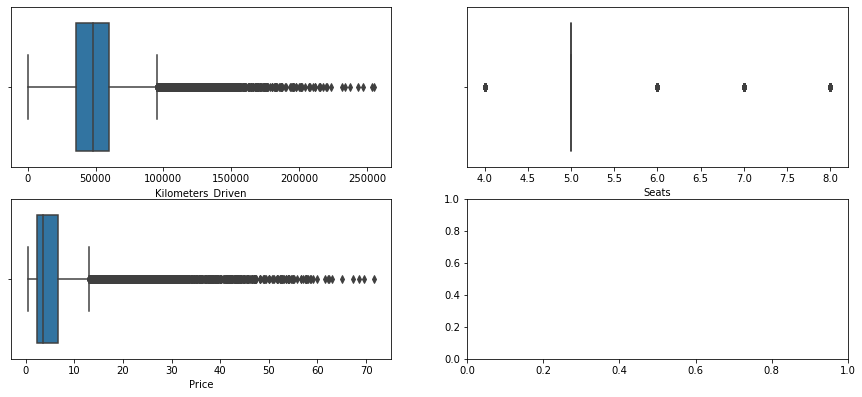

In [542]:
c=1
plt.figure(figsize=(15,10))

for i in num:
    sns.boxplot(num[i])
    plt.subplot(3,2,c)
    c+=1
    
plt.show()

In [543]:
sample=comb.copy()

In [544]:
sample.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                341
Engine                 106
Power                  317
Seats                  338
New_Price            61934
Price                52500
dtype: int64

In [545]:
## Creating the base model with all the features, treating missing values with mode and medians
sample["Mileage"].mode()
sample["Engine"].mode()
sample["Power"].mode()
sample["Seats"].median()

5.0

In [546]:
sample["Mileage"].fillna(sample["Mileage"].mode()[0], inplace=True)
sample["Engine"].fillna(sample["Engine"].mode()[0], inplace=True)
sample["Power"].fillna(sample["Power"].mode()[0], inplace=True)
sample["Seats"].fillna(sample["Seats"].median(), inplace=True)

## Treating null values.
## Dropping New_Price as it has 82% missing values.

In [547]:
sample.drop(columns="New_Price", inplace=True)

In [548]:
sample.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                52500
dtype: int64

In [549]:
z=pd.get_dummies(sample)

In [550]:
# splitting back train and test
newtrain=z.iloc[0:train.shape[0],:]
newtest=z.iloc[train.shape[0]:,:]

In [551]:
x_train=newtrain.drop(columns="Price")
x_test=newtest.drop(columns="Price")

In [641]:
y_train=newtrain["Price"]
y_test=newtest["Price"]

0        25.53
1         4.58
2         2.37
3         1.20
4        33.04
         ...  
22495     2.23
22496     2.36
22497     2.58
22498    16.46
22499     4.92
Name: Price, Length: 22500, dtype: float64

In [553]:
# x_train=pd.get_dummies(x_train, drop_first=True)

In [554]:
# x_test=pd.get_dummies(x_test, drop_first=True)

In [555]:
x_train.shape

(22500, 2500)

In [556]:
x_test.shape

(52500, 2500)

In [557]:
## Now since we have treated all the null values,
## Now we will go ahead and build our base model and check for the most important coefficent values.

import statsmodels.api as sm

x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     4.456
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:59:21   Log-Likelihood:                -72263.
No. Observations:               22500   AIC:                         1.489e+05
Df Residuals:                   20318   BIC:                         1.664e+05
Df Model:                        2181                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [558]:
x_test=sm.add_constant(x_test)


In [559]:
y_pred=model.predict(x_test)


In [560]:
y_pred

0        14.918823
1         6.394995
2         8.185783
3         2.001244
4        12.480573
           ...    
52495     8.942706
52496     4.167427
52497    10.972007
52498    10.522322
52499    -0.263653
Length: 52500, dtype: float64

In [561]:
from sklearn.metrics import mean_squared_error

In [562]:
line_reg=pd.DataFrame({'Name':test.Name,'Price':y_pred})


line_reg.to_csv('line_reg.csv',index=False)

In [563]:
## with the base model we observe that we have obtained an RMSE of 8.
## Thus we would switch back to feature engineering.


# Feature Engineering 2

In [564]:
comb.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [565]:
comb.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                341
Engine                 106
Power                  317
Seats                  338
New_Price            61934
Price                52500
dtype: int64

In [566]:
comb.loc[comb["Mileage"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
45,Tata Tiago 1.2 Revotron XZ,Pune,2012,45995,Diesel,Automatic,First,NaN,2987 CC,140 bhp,8.0,NaN,28.69
278,Maruti Ciaz Zeta,Mumbai,2009,57052,Petrol,Manual,First,NaN,998 CC,88.5 bhp,5.0,NaN,1.75
474,BMW X5 xDrive 30d,Hyderabad,2011,55871,Petrol,Manual,First,NaN,1197 CC,121.36 bhp,5.0,NaN,2.63
1234,Skoda Superb Elegance 1.8 TSI AT,Hyderabad,2014,70428,Diesel,Automatic,Third,NaN,2494 CC,70 bhp,5.0,4.59 Lakh,8.52
1249,Hyundai i20 Asta (o) 1.4 CRDi (Diesel),Kolkata,2007,47157,CNG,Manual,Third,NaN,1298 CC,235 bhp,7.0,12.57 Lakh,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51251,Ford Figo Diesel ZXI,Chennai,2010,49318,CNG,Manual,First,NaN,1399 CC,184 bhp,5.0,NaN,NaN
51319,Renault Duster 110PS Diesel RxZ,Mumbai,2012,47934,Petrol,Manual,First,NaN,1498 CC,37.48 bhp,5.0,NaN,NaN
51851,Audi A6 2011-2015 35 TFSI Technology,Bangalore,2009,54054,Petrol,Manual,First,NaN,1798 CC,117.3 bhp,5.0,NaN,NaN
51888,Volkswagen Polo Petrol Comfortline 1.2L,Hyderabad,2009,60983,Diesel,Manual,First,NaN,998 CC,74 bhp,5.0,NaN,NaN


In [567]:
comb["Mileage"]

0        16.46 kmpl
1         18.6 kmpl
2         15.3 kmpl
3        25.47 kmpl
4        19.12 kmpl
            ...    
52495    16.09 kmpl
52496     12.6 kmpl
52497     22.0 kmpl
52498    10.98 kmpl
52499     14.0 kmpl
Name: Mileage, Length: 75000, dtype: object

In [568]:
comb["Engine"]= comb["Engine"].str.strip(" CC").astype(float)

In [569]:
comb["Mileage"]=comb["Mileage"].str.strip()

In [570]:
comb["Mileage"]=comb["Mileage"].str.replace("kmpl","")

In [571]:
comb["Mileage"]=comb["Mileage"].str.replace("km/kg", "")

In [572]:
comb["Mileage"]=comb["Mileage"].astype(float)

In [573]:
comb["Mileage"].median()

17.8

In [574]:
comb.loc[comb["Mileage"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
45,Tata Tiago 1.2 Revotron XZ,Pune,2012,45995,Diesel,Automatic,First,NaN,2987.0,140 bhp,8.0,NaN,28.69
278,Maruti Ciaz Zeta,Mumbai,2009,57052,Petrol,Manual,First,NaN,998.0,88.5 bhp,5.0,NaN,1.75
474,BMW X5 xDrive 30d,Hyderabad,2011,55871,Petrol,Manual,First,NaN,1197.0,121.36 bhp,5.0,NaN,2.63
1234,Skoda Superb Elegance 1.8 TSI AT,Hyderabad,2014,70428,Diesel,Automatic,Third,NaN,2494.0,70 bhp,5.0,4.59 Lakh,8.52
1249,Hyundai i20 Asta (o) 1.4 CRDi (Diesel),Kolkata,2007,47157,CNG,Manual,Third,NaN,1298.0,235 bhp,7.0,12.57 Lakh,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51251,Ford Figo Diesel ZXI,Chennai,2010,49318,CNG,Manual,First,NaN,1399.0,184 bhp,5.0,NaN,NaN
51319,Renault Duster 110PS Diesel RxZ,Mumbai,2012,47934,Petrol,Manual,First,NaN,1498.0,37.48 bhp,5.0,NaN,NaN
51851,Audi A6 2011-2015 35 TFSI Technology,Bangalore,2009,54054,Petrol,Manual,First,NaN,1798.0,117.3 bhp,5.0,NaN,NaN
51888,Volkswagen Polo Petrol Comfortline 1.2L,Hyderabad,2009,60983,Diesel,Manual,First,NaN,998.0,74 bhp,5.0,NaN,NaN


In [575]:
comb["Mileage"].fillna(comb["Mileage"].median(), inplace=True)

In [576]:
comb.drop(columns="New_Price",inplace=True)

In [577]:
comb.Engine.median()

1495.0

In [578]:
comb["Engine"].fillna(comb["Engine"].median(), inplace=True)

In [579]:
comb.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46,1248.0,100 bhp,5.0,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.60,2993.0,61 bhp,4.0,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.30,1599.0,140 bhp,5.0,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47,1196.0,86.8 bhp,5.0,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12,1999.0,115 bhp,7.0,33.04


In [580]:
comb.Location.value_counts()

## We can subdivide the location into north/south/East/West

# North=Jaipur, Delhi 
# East=Kolkata,Coimbatore
# West=Ahmedabad,Mumbai,Pune
# South=Hyderabad,Bangalore,Kochi,Chennai

Mumbai        14432
Hyderabad     12869
Kolkata       11531
Chennai        7829
Jaipur         5914
Delhi          4934
Bangalore      4374
Kochi          3724
Coimbatore     3602
Pune           3432
Ahmedabad      2359
Name: Location, dtype: int64

In [581]:
comb.Kilometers_Driven.value_counts()

## We can distribute the Kilometers driven into less than 30k
## 30k-60k, 60k and above.

171      150
47108      9
49946      9
42529      8
46172      8
        ... 
23250      1
33955      1
33676      1
24420      1
49088      1
Name: Kilometers_Driven, Length: 45993, dtype: int64

In [582]:
comb.Kilometers_Driven.describe()

count     75000.000000
mean      48859.175787
std       21583.406967
min         171.000000
25%       35710.750000
50%       47861.000000
75%       59548.250000
max      255022.000000
Name: Kilometers_Driven, dtype: float64

In [583]:
comb.Owner_Type.value_counts()

## We can divide this into First and Multiple

First             67452
Second             5647
Third              1736
Fourth & Above      165
Name: Owner_Type, dtype: int64

In [584]:
comb.Engine.value_counts()

## We can subdivide into 
## Less than 1000 
## between 1000-2000
## More than 2000

998.0     7398
1197.0    6127
1498.0    3900
1248.0    3032
1198.0    2627
          ... 
2694.0      17
2200.0      16
2495.0      15
1489.0      14
3200.0      12
Name: Engine, Length: 146, dtype: int64

In [585]:
comb.Power.value_counts()

58.16 bhp     4550
67.1 bhp      3014
null bhp      2316
121.3 bhp     1604
70 bhp        1549
              ... 
52.8 bhp        16
74.93 bhp       16
73.74 bhp       15
254 bhp         12
181.04 bhp       7
Name: Power, Length: 372, dtype: int64

In [586]:
comb.Power.describe()

count         74683
unique          372
top       58.16 bhp
freq           4550
Name: Power, dtype: object

In [587]:
comb["Power"]=comb["Power"].str.replace("bhp", "")

In [588]:
comb["Power"]=comb["Power"].str.replace("null", str(0.0))

In [589]:
comb["Power"]=comb["Power"].astype(float)

In [590]:
comb["Power"].describe()

## we can divide the power as less than 70
## 70-110
## 110-150
## above 150

count    74683.000000
mean       113.108724
std         66.714520
min          0.000000
25%         70.000000
50%         90.000000
75%        140.000000
max        560.000000
Name: Power, dtype: float64

In [591]:
comb.Seats.value_counts()

## Since this is a numerical column, so we can 

5.0    61356
7.0     9535
8.0     2654
4.0      777
6.0      340
Name: Seats, dtype: int64

In [592]:
comb.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.30,1599.0,140.0,5.0,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47,1196.0,86.8,5.0,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12,1999.0,115.0,7.0,33.04


In [593]:
comb["Name"].value_counts()

Maruti Wagon R LXI CNG                                  449
Honda City 1.5 S MT                                     430
Maruti Swift VDI                                        415
Hyundai i10 Sportz                                      374
BMW 3 Series 320d                                       370
                                                       ... 
Mercedes-Benz New C-Class C 200 Avantgarde Edition C      1
Volkswagen Ameo 1.2 MPI Highline Plus 16                  1
Mercedes-Benz GLA Class 200 d Style                       1
Hyundai i20 Active S Diesel                               1
Maruti Ertiga VDI Limited Edition                         1
Name: Name, Length: 1515, dtype: int64

In [594]:
comb.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.30,1599.0,140.0,5.0,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47,1196.0,86.8,5.0,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12,1999.0,115.0,7.0,33.04


In [595]:
North=["Jaipur", "Delhi"]
East=["Kolkata","Coimbatore"]
West=["Ahmedabad","Mumbai,Pune"]
South=["Hyderabad","Bangalore","Kochi","Chennai"]

In [596]:
def loc(x):
    if x in North:
        return("North")
    elif x in East:
        return("East")
    elif x in West:
        return("West")
    else:
        return("South")
            

In [597]:
comb["Location"]=comb["Location"].apply(loc)

In [598]:
comb["Location"].value_counts()

South    46660
East     15133
North    10848
West      2359
Name: Location, dtype: int64

In [599]:
comb.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti 800 Std BSIII,South,2012,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,25.53
1,Honda City 1.5 V AT,North,2013,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,4.58
2,Honda CR-V RVi MT,North,2007,16460,CNG,Manual,Third,15.30,1599.0,140.0,5.0,2.37
3,Skoda Yeti Ambition 4X2,East,2009,35048,Petrol,Manual,First,25.47,1196.0,86.8,5.0,1.20
4,Hyundai i10 Magna LPG,East,2013,41656,Petrol,Automatic,First,19.12,1999.0,115.0,7.0,33.04


In [600]:
def Fuel(x):
    if x =="Petrol":
        return(1)
    elif x=="Diesel":
        return(2)
    else:
        return(0)

In [601]:
comb["Fuel_Type"]=comb["Fuel_Type"].apply(Fuel)

In [602]:
comb["Fuel_Type"].value_counts()

1    33678
2    33567
0     7755
Name: Fuel_Type, dtype: int64

In [603]:
def trans(x):
    if x=="Manual":
        return (1)
    else:
        return(0)

In [605]:
comb["Fuel_Type"].value_counts()

1    33678
2    33567
0     7755
Name: Fuel_Type, dtype: int64

In [606]:
comb["Transmission"].value_counts()

Manual       60107
Automatic    14893
Name: Transmission, dtype: int64

In [607]:
comb["Transmission"]=comb["Transmission"].apply(trans)

In [608]:
comb.Transmission.value_counts()

1    60107
0    14893
Name: Transmission, dtype: int64

In [609]:
comb.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti 800 Std BSIII,South,2012,33715,2,1,First,16.46,1248.0,100.0,5.0,25.53
1,Honda City 1.5 V AT,North,2013,73977,2,1,First,18.60,2993.0,61.0,4.0,4.58
2,Honda CR-V RVi MT,North,2007,16460,0,1,Third,15.30,1599.0,140.0,5.0,2.37
3,Skoda Yeti Ambition 4X2,East,2009,35048,1,1,First,25.47,1196.0,86.8,5.0,1.20
4,Hyundai i10 Magna LPG,East,2013,41656,1,0,First,19.12,1999.0,115.0,7.0,33.04


In [610]:
comb["Owner_Type"].value_counts()

First             67452
Second             5647
Third              1736
Fourth & Above      165
Name: Owner_Type, dtype: int64

In [611]:
def own(x):
    if x =="First":
        return(1)
    else:
        return(0)

In [612]:
comb["Owner_Type"]=comb["Owner_Type"].apply(own)

In [613]:
comb["Owner_Type"].value_counts()

1    67452
0     7548
Name: Owner_Type, dtype: int64

In [614]:
comb.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti 800 Std BSIII,South,2012,33715,2,1,1,16.46,1248.0,100.0,5.0,25.53
1,Honda City 1.5 V AT,North,2013,73977,2,1,1,18.60,2993.0,61.0,4.0,4.58
2,Honda CR-V RVi MT,North,2007,16460,0,1,0,15.30,1599.0,140.0,5.0,2.37
3,Skoda Yeti Ambition 4X2,East,2009,35048,1,1,1,25.47,1196.0,86.8,5.0,1.20
4,Hyundai i10 Magna LPG,East,2013,41656,1,0,1,19.12,1999.0,115.0,7.0,33.04


In [615]:
comb.Power.fillna(comb.Power.median(), inplace=True)

In [616]:
comb.Seats.fillna(comb.Seats.mode()[0], inplace=True)

In [617]:
data=comb.drop(columns="Name")

In [618]:
dummy=pd.get_dummies(data)

In [619]:
# splitting back train and test
newtrain_=dummy.iloc[0:train.shape[0],:]
newtest_=dummy.iloc[train.shape[0]:,:]

In [620]:
newtrain_.shape, newtest_.shape

((22500, 14), (52500, 14))

In [621]:
newtrain_

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_East,Location_North,Location_South,Location_West
0,2012,33715,2,1,1,16.46,1248.0,100.00,5.0,25.53,0,0,1,0
1,2013,73977,2,1,1,18.60,2993.0,61.00,4.0,4.58,0,1,0,0
2,2007,16460,0,1,0,15.30,1599.0,140.00,5.0,2.37,0,1,0,0
3,2009,35048,1,1,1,25.47,1196.0,86.80,5.0,1.20,1,0,0,0
4,2013,41656,1,0,1,19.12,1999.0,115.00,7.0,33.04,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,2009,39656,0,1,0,21.10,1368.0,100.60,5.0,2.23,0,0,1,0
22496,2012,39798,1,1,1,33.44,1197.0,90.00,5.0,2.36,0,0,1,0
22497,2011,49958,2,1,1,26.21,1298.0,58.16,5.0,2.58,0,1,0,0
22498,2014,39516,1,1,1,17.80,1198.0,75.00,5.0,16.46,0,0,1,0


In [622]:
y_train=newtrain["Price"]
y_test=newtest["Price"]

In [651]:
newtrain_.isnull().sum()

const                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Location_East        0
Location_North       0
Location_South       0
Location_West        0
dtype: int64

In [652]:
newtrain_.drop(columns="Price", inplace=True)

In [656]:
newtrain_.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Location_East',
       'Location_North', 'Location_South', 'Location_West'],
      dtype='object')

In [657]:
## Now since we have treated all the null values,
## Now we will go ahead and build our base model and check for the most important coefficent values.

## Now since we have treated all the null values,
## Now we will go ahead and build our base model and check for the most important coefficent values.

import statsmodels.api as sm

newtrain_=sm.add_constant(newtrain_)
model2=sm.OLS(y_train,newtrain_).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     422.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:13:23   Log-Likelihood:                -74374.
No. Observations:               22500   AIC:                         1.488e+05
Df Residuals:                   22487   BIC:                         1.489e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -114.5512     27.59

In [648]:
newtest_.drop(columns="Price", inplace=True)


In [654]:
newtest_=sm.add_constant(newtest_)

In [658]:
y_pred_2=model2.predict(newtest_)

In [659]:
y_pred_2

0        14.082005
1        12.536029
2         9.982430
3         5.206070
4        12.408683
           ...    
52495     8.378957
52496     6.767474
52497     8.269686
52498     7.368787
52499     7.330400
Length: 52500, dtype: float64

In [627]:
feat_2=pd.DataFrame({'Name':test.Name,'Price':y_pred_2})


feat_2.to_csv('feat_2.csv',index=False)

In [628]:
## Now we will scale our data and then fit the model once agin and look for better performance. 

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [629]:
a=sc.fit_transform(dummy)

In [630]:
df=pd.DataFrame(a, columns=dummy.columns)

In [631]:
# splitting back train and test
df_train=df.iloc[0:train.shape[0],:]
df_test=df.iloc[train.shape[0]:,:]

In [632]:
df_test=sm.add_constant(df_test)

In [660]:
y_train

0        25.53
1         4.58
2         2.37
3         1.20
4        33.04
         ...  
22495     2.23
22496     2.36
22497     2.58
22498    16.46
22499     4.92
Name: Price, Length: 22500, dtype: float64

In [662]:
df_train.drop(columns="Price", inplace=True)

In [663]:
df_train=sm.add_constant(df_train)
model3=sm.OLS(y_train,df_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     422.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:14:52   Log-Likelihood:                -74374.
No. Observations:               22500   AIC:                         1.488e+05
Df Residuals:                   22487   BIC:                         1.489e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3884      0.04

In [664]:
## Printing the obtained result.

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     422.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:15:02   Log-Likelihood:                -74374.
No. Observations:               22500   AIC:                         1.488e+05
Df Residuals:                   22487   BIC:                         1.489e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3884      0.044    145.177      0.000       6.302       6.475
Year                  0.1897      0.046      4.118      0.000       0.099       0.280
Kilometers_Driven    -0.2269      0.046     -4.973      0.000      -0.316      -0.137
Fuel_Type             1.3079      0.047     27.788      0.000       1.216       1.400
Transmission         -1.4169      0.046    -30.510      0.000      -1.508      -1.326
Owner_Type            0.0213      0.046      0.467      0.641      -0.068       0.111
Mileage              -0.1996      0.044     -4.504      0.000      -0.286      -0.113
Engine                0.7809      0.046     16.938      0.000       0.691       0.871
Power                 0.4560      0.045     10.203      0.000       0.368       0.544
Seats                 0.9879      0.046     21.466      0.000       0.898       1.078
Location_East        -0.2638      0.032     -8.238      0.000      -0.327      -0.201
Location_North        0.3987      0.035     11.245      0.000       0.329       0.468
Location_South       -0.0680      0.025     -2.683      0.007      -0.118      -0.018
Location_West        -0.0079      0.042     -0.188      0.851      -0.091       0.075
==============================================================================
Omnibus:                    14070.502   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178550.052
Skew:                           2.850   Prob(JB):                         0.00
Kurtosis:                      15.569   Cond. No.                     2.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.29e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [667]:
df_test.drop(columns="Price", inplace=True)

In [668]:
y_pred3=model3.predict(df_test)

In [687]:
y_pred4=y_pred3.reset_index()

In [689]:
y_pred4.drop(columns="index", inplace=True)

In [701]:
p=y_pred4[0]

In [704]:
feat_5=pd.DataFrame({'Name':test.Name,'Price':p})


feat_5.to_csv('feat_5.csv',index=False)

In [703]:
feat_5

,Name,Price
0,Ford Figo Diesel Titanium,14.082005
1,Maruti SX4 VDI,12.536029
2,Hyundai Creta 1.6 SX Option,9.982430
3,Jeep Compass 2.0 Limited 4X4,5.206070
4,Maruti Swift Dzire VDI,12.408683
...,...,...
52495,Honda Mobilio S i DTEC,8.378957
52496,Toyota Etios Liva 1.2 G,6.767474
52497,Maruti Zen LX,8.269686
52498,Toyota Innova 2.5 VX (Diesel) 7 Seater,7.368787


In [707]:
data
## Creating more features from the available data.

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,South,2012,33715,2,1,1,16.46,1248.0,100.0,5.0,25.53
1,North,2013,73977,2,1,1,18.60,2993.0,61.0,4.0,4.58
2,North,2007,16460,0,1,0,15.30,1599.0,140.0,5.0,2.37
3,East,2009,35048,1,1,1,25.47,1196.0,86.8,5.0,1.20
4,East,2013,41656,1,0,1,19.12,1999.0,115.0,7.0,33.04
...,...,...,...,...,...,...,...,...,...,...,...
52495,East,2014,59533,2,1,1,16.09,1248.0,0.0,8.0,NaN
52496,South,2017,56122,2,1,1,12.60,1591.0,85.8,5.0,NaN
52497,South,2012,57365,2,1,1,22.00,2993.0,174.3,5.0,NaN
52498,South,2012,33307,2,1,1,10.98,1995.0,112.0,5.0,NaN


In [717]:
data["Fuel_Type"].value_counts()

2.0    33678
1.0    33567
0.5     7755
Name: Fuel_Type, dtype: int64

In [712]:
data["Fuel_Type"].replace(0,0.5, inplace=True)

In [714]:
data["Fuel_Type"].replace(1,1.5, inplace=True)

In [715]:
data["Fuel_Type"].replace(2,1, inplace=True)

In [716]:
data["Fuel_Type"].replace(1.5,2, inplace=True)

In [722]:
data["Transmission"].replace(0,2, inplace=True)

In [723]:
data.head(10)
## Creating new interaction effect 
## Fuel Used = Kms_driven/Mileage
## Transmission/fuel type
## Vehicle age

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Vehicle_Age,Fuel_Used
0,South,2012,33715,1.0,1,1,16.46,1248.0,100.0,5.0,25.53,10,33698.54
1,North,2013,73977,1.0,1,1,18.60,2993.0,61.0,4.0,4.58,9,73958.40
2,North,2007,16460,0.5,1,0,15.30,1599.0,140.0,5.0,2.37,15,16444.70
3,East,2009,35048,2.0,1,1,25.47,1196.0,86.8,5.0,1.20,13,35022.53
4,East,2013,41656,2.0,2,1,19.12,1999.0,115.0,7.0,33.04,9,41636.88
5,South,2011,58764,1.0,1,1,20.40,1956.0,98.6,7.0,8.24,11,58743.60
6,South,2010,47655,1.0,2,1,25.44,2982.0,57.5,7.0,11.10,12,47629.56
7,South,2010,73709,2.0,1,1,17.50,1198.0,78.9,5.0,1.76,12,73691.50
8,South,2012,49736,1.0,2,1,23.65,2143.0,121.3,7.0,17.63,10,49712.35
9,East,2010,14348,2.0,1,1,22.50,1197.0,0.0,5.0,1.29,12,14325.50


In [719]:
data["Vehicle_Age"]=2022-data["Year"]

In [720]:
data["Fuel_Used"]=data["Kilometers_Driven"]-data["Mileage"]

In [724]:
data["Engine_value"]=data["Fuel_Type"]*data["Transmission"]

In [725]:
data.head()

## Now we can drop the year column.

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Vehicle_Age,Fuel_Used,Engine_value
0,South,2012,33715,1.0,1,1,16.46,1248.0,100.0,5.0,25.53,10,33698.54,1.0
1,North,2013,73977,1.0,1,1,18.60,2993.0,61.0,4.0,4.58,9,73958.40,1.0
2,North,2007,16460,0.5,1,0,15.30,1599.0,140.0,5.0,2.37,15,16444.70,0.5
3,East,2009,35048,2.0,1,1,25.47,1196.0,86.8,5.0,1.20,13,35022.53,2.0
4,East,2013,41656,2.0,2,1,19.12,1999.0,115.0,7.0,33.04,9,41636.88,4.0


In [727]:
data.drop(columns="Year", inplace=True)

In [730]:
data.drop(columns="Location", inplace=True)

In [763]:
data["Location"]=comb["Location"]

In [765]:
data=pd.get_dummies(data)

In [766]:
data.shape

(75000, 16)

In [767]:
## Now splitting the data into train test shape
xtrain=data.iloc[0:train.shape[0],:]
xtest=data.iloc[train.shape[0]:,:]

In [768]:
xtrain.shape,xtest.shape

((22500, 16), (52500, 16))

In [736]:
ytrain=xtrain["Price"]

In [769]:
xtrain.shape,xtest.shape,ytrain.shape

((22500, 16), (52500, 16), (22500,))

In [776]:
xtrain.drop(columns="Price", inplace=True)
xtest.drop(columns="Price",inplace=True)

In [777]:
xtrain.shape,xtest.shape,ytrain.shape

((22500, 16), (52500, 15), (22500,))

In [ ]:
## Modelling with the newly created features.

In [742]:
from sklearn.ensemble import RandomForestRegressor

In [743]:
rf=RandomForestRegressor(n_estimators=50,max_depth=12)

In [744]:
model_rf=rf.fit(xtrain,ytrain)

In [745]:
out_rf=model_rf.predict(xtest)

In [747]:
rf_mod=pd.DataFrame({"Name":test.Name, "Price":out_rf})

In [749]:
rf_mod.to_csv('rf_mod.csv',index=False)

In [750]:
## GBM

from sklearn.ensemble import GradientBoostingRegressor

In [751]:
gbm=GradientBoostingRegressor(max_depth=10,alpha=0.4,random_state= 454)

In [753]:
model_gbm=gbm.fit(xtrain,ytrain)

In [754]:
mod_gbm=model_gbm.predict(xtest)

In [755]:
mod=pd.DataFrame({"Name":test.Name, "Price":mod_gbm})

mod.to_csv('rf_mod.csv',index=False)

In [758]:
from xgboost import XGBRegressor

In [872]:
xgb=XGBRegressor()

In [770]:
model_xgb=xgb.fit(xtrain,ytrain)

In [771]:
out_xgb=model_xgb.predict(xtest)

In [772]:
xgb2=pd.DataFrame({"Name":test.Name, "Price":out_xgb})

xgb2.to_csv('xgb2.csv',index=False)

In [845]:
model_xgb=xgb.fit(Xtrain,ytrain)

In [846]:
out_xgb=model_xgb.predict(Xtest)

In [847]:
xgb3=pd.DataFrame({"Name":test.Name, "Price":out_xgb})

xgb3.to_csv('xgb3.csv',index=False)

In [780]:
xtrain

,const,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Vehicle_Age,Fuel_Used,Engine_value,Location_East,Location_North,Location_South,Location_West
0,1.0,33715,1.0,1,1,16.46,1248.0,100.00,5.0,10,33698.54,1.0,0,0,1,0
1,1.0,73977,1.0,1,1,18.60,2993.0,61.00,4.0,9,73958.40,1.0,0,1,0,0
2,1.0,16460,0.5,1,0,15.30,1599.0,140.00,5.0,15,16444.70,0.5,0,1,0,0
3,1.0,35048,2.0,1,1,25.47,1196.0,86.80,5.0,13,35022.53,2.0,1,0,0,0
4,1.0,41656,2.0,2,1,19.12,1999.0,115.00,7.0,9,41636.88,4.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,1.0,39656,0.5,1,0,21.10,1368.0,100.60,5.0,13,39634.90,0.5,0,0,1,0
22496,1.0,39798,2.0,1,1,33.44,1197.0,90.00,5.0,10,39764.56,2.0,0,0,1,0
22497,1.0,49958,1.0,1,1,26.21,1298.0,58.16,5.0,11,49931.79,1.0,0,1,0,0
22498,1.0,39516,2.0,1,1,17.80,1198.0,75.00,5.0,8,39498.20,2.0,0,0,1,0


In [779]:
xtrain=sm.add_constant(xtrain)
model3=sm.OLS(ytrain,xtrain).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     365.1
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:50:06   Log-Likelihood:                -74507.
No. Observations:               22500   AIC:                         1.490e+05
Df Residuals:                   22486   BIC:                         1.492e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.0938      0.46

In [782]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [783]:
vif=pd.DataFrame()

In [ ]:
vif["Feature"]=data.columns

In [784]:
vif=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
pd.DataFrame({"VIF":vif[:]}, index=xtrain.columns)

,VIF
const,0.000000
Kilometers_Driven,inf
Fuel_Type,11.229386
Transmission,8.499403
Owner_Type,1.063907
Mileage,inf
Engine,1.099469
Power,1.053405
Seats,1.078422
Vehicle_Age,1.072625


In [ ]:
# ## Based on vif, we drop all the Location based columns.
# and check for vif once again.

In [797]:
data.head()
Data=data.drop(columns=["Location_East","Location_West","Location_North","Location_South","Kilometers_Driven"])

In [798]:
## Now checking for vif once again

## Now splitting the data into train test shape
Xtrain=Data.iloc[0:train.shape[0],:]
Xtest=Data.iloc[train.shape[0]:,:]


In [799]:
Xtrain.shape,Xtest.shape,ytrain.shape

((22500, 11), (52500, 11), (22500,))

In [800]:
vif=pd.DataFrame()

In [801]:
vif=[variance_inflation_factor(Xtrain.values,i) for i in range(Xtrain.shape[1])]
pd.DataFrame({"VIF":vif[:]}, index=Xtrain.columns)

## Dropping kilometers driven

,VIF
Fuel_Type,49.197232
Transmission,57.911731
Owner_Type,10.179689
Mileage,13.022296
Engine,7.512242
Power,3.998435
Seats,36.308193
Price,2.098306
Vehicle_Age,14.758560
Fuel_Used,6.444660


In [802]:
import lightgbm

In [839]:
from lightgbm import LGBMRegressor

In [840]:
lg=LGBMRegressor(random_state=464)

In [841]:
model_lg=lg.fit(Xtrain,ytrain)

In [842]:
lg_mod=model_lg.predict(Xtest)

In [843]:
mod=pd.DataFrame({"Name":test.Name, "Price":lg_mod})

mod.to_csv('lgbmmod.csv',index=False)

In [811]:
newtrain_.drop(columns="const", inplace=True)

In [812]:
newtest_.drop(columns="const", inplace=True)

In [813]:
newtrain_.shape, newtest_.shape, ytrain.shape

((22500, 13), (52500, 13), (22500,))

In [816]:
model_lg2=lg.fit(newtrain_,ytrain)

In [817]:
lg_mod2=model_lg.predict(newtest_)

In [820]:
mod=pd.DataFrame({"Name":test.Name, "Price":lg_mod2})

mod.to_csv('lgbm2.csv',index=False)

In [821]:
from catboost import CatBoostRegressor

In [822]:
cboost=CatBoostRegressor()

In [828]:
model_cboost=cboost.fit(newtrain_,ytrain)

Learning rate set to 0.066961
0:	learn: 7.2083764	total: 9.18ms	remaining: 9.17s
1:	learn: 7.1340682	total: 17.8ms	remaining: 8.9s
2:	learn: 7.0593464	total: 26.9ms	remaining: 8.95s
3:	learn: 6.9948661	total: 36.6ms	remaining: 9.1s
4:	learn: 6.9339718	total: 44.5ms	remaining: 8.86s
5:	learn: 6.8839981	total: 55ms	remaining: 9.11s
6:	learn: 6.8372791	total: 64.3ms	remaining: 9.13s
7:	learn: 6.7977161	total: 74.4ms	remaining: 9.22s
8:	learn: 6.7596907	total: 83.4ms	remaining: 9.18s
9:	learn: 6.7246894	total: 93.5ms	remaining: 9.26s
10:	learn: 6.6941455	total: 103ms	remaining: 9.23s
11:	learn: 6.6692802	total: 111ms	remaining: 9.13s
12:	learn: 6.6452683	total: 119ms	remaining: 9s
13:	learn: 6.6237890	total: 129ms	remaining: 9.07s
14:	learn: 6.6049093	total: 137ms	remaining: 9.03s
15:	learn: 6.5885119	total: 148ms	remaining: 9.08s
16:	learn: 6.5744391	total: 159ms	remaining: 9.21s
17:	learn: 6.5614592	total: 172ms	remaining: 9.37s
18:	learn: 6.5490092	total: 184ms	remaining: 9.5s
19:	learn

160:	learn: 6.2510327	total: 1.67s	remaining: 8.71s
161:	learn: 6.2498295	total: 1.68s	remaining: 8.7s
162:	learn: 6.2488180	total: 1.69s	remaining: 8.69s
163:	learn: 6.2476548	total: 1.7s	remaining: 8.69s
164:	learn: 6.2464373	total: 1.72s	remaining: 8.68s
165:	learn: 6.2454430	total: 1.73s	remaining: 8.69s
166:	learn: 6.2448554	total: 1.74s	remaining: 8.68s
167:	learn: 6.2439102	total: 1.75s	remaining: 8.66s
168:	learn: 6.2431652	total: 1.76s	remaining: 8.64s
169:	learn: 6.2415726	total: 1.77s	remaining: 8.62s
170:	learn: 6.2405277	total: 1.77s	remaining: 8.61s
171:	learn: 6.2397969	total: 1.79s	remaining: 8.61s
172:	learn: 6.2385014	total: 1.8s	remaining: 8.6s
173:	learn: 6.2376992	total: 1.81s	remaining: 8.58s
174:	learn: 6.2365847	total: 1.81s	remaining: 8.55s
175:	learn: 6.2356966	total: 1.82s	remaining: 8.52s
176:	learn: 6.2340682	total: 1.83s	remaining: 8.5s
177:	learn: 6.2325605	total: 1.83s	remaining: 8.47s
178:	learn: 6.2315992	total: 1.84s	remaining: 8.46s
179:	learn: 6.230

328:	learn: 6.0876156	total: 3.14s	remaining: 6.4s
329:	learn: 6.0863708	total: 3.15s	remaining: 6.39s
330:	learn: 6.0857835	total: 3.15s	remaining: 6.38s
331:	learn: 6.0852748	total: 3.17s	remaining: 6.37s
332:	learn: 6.0843030	total: 3.17s	remaining: 6.36s
333:	learn: 6.0837447	total: 3.19s	remaining: 6.35s
334:	learn: 6.0833766	total: 3.19s	remaining: 6.34s
335:	learn: 6.0826328	total: 3.2s	remaining: 6.32s
336:	learn: 6.0817084	total: 3.21s	remaining: 6.31s
337:	learn: 6.0806860	total: 3.21s	remaining: 6.29s
338:	learn: 6.0801807	total: 3.22s	remaining: 6.28s
339:	learn: 6.0789162	total: 3.23s	remaining: 6.27s
340:	learn: 6.0776505	total: 3.23s	remaining: 6.25s
341:	learn: 6.0764300	total: 3.24s	remaining: 6.24s
342:	learn: 6.0757769	total: 3.25s	remaining: 6.22s
343:	learn: 6.0754401	total: 3.27s	remaining: 6.24s
344:	learn: 6.0743723	total: 3.28s	remaining: 6.22s
345:	learn: 6.0735717	total: 3.28s	remaining: 6.21s
346:	learn: 6.0728381	total: 3.29s	remaining: 6.19s
347:	learn: 6.

514:	learn: 5.9440977	total: 4.6s	remaining: 4.33s
515:	learn: 5.9435304	total: 4.61s	remaining: 4.32s
516:	learn: 5.9429252	total: 4.62s	remaining: 4.31s
517:	learn: 5.9421488	total: 4.63s	remaining: 4.31s
518:	learn: 5.9414263	total: 4.64s	remaining: 4.3s
519:	learn: 5.9410078	total: 4.64s	remaining: 4.29s
520:	learn: 5.9403383	total: 4.65s	remaining: 4.28s
521:	learn: 5.9392929	total: 4.66s	remaining: 4.27s
522:	learn: 5.9390787	total: 4.67s	remaining: 4.25s
523:	learn: 5.9385607	total: 4.67s	remaining: 4.24s
524:	learn: 5.9381096	total: 4.68s	remaining: 4.23s
525:	learn: 5.9374010	total: 4.69s	remaining: 4.22s
526:	learn: 5.9364182	total: 4.7s	remaining: 4.21s
527:	learn: 5.9357267	total: 4.7s	remaining: 4.2s
528:	learn: 5.9352179	total: 4.71s	remaining: 4.19s
529:	learn: 5.9342382	total: 4.72s	remaining: 4.18s
530:	learn: 5.9334112	total: 4.72s	remaining: 4.17s
531:	learn: 5.9327925	total: 4.73s	remaining: 4.16s
532:	learn: 5.9321861	total: 4.74s	remaining: 4.15s
533:	learn: 5.931

679:	learn: 5.8396844	total: 5.89s	remaining: 2.77s
680:	learn: 5.8389837	total: 5.9s	remaining: 2.76s
681:	learn: 5.8381242	total: 5.91s	remaining: 2.75s
682:	learn: 5.8373406	total: 5.92s	remaining: 2.75s
683:	learn: 5.8369035	total: 5.93s	remaining: 2.74s
684:	learn: 5.8361892	total: 5.94s	remaining: 2.73s
685:	learn: 5.8357215	total: 5.94s	remaining: 2.72s
686:	learn: 5.8351617	total: 5.95s	remaining: 2.71s
687:	learn: 5.8344855	total: 5.96s	remaining: 2.7s
688:	learn: 5.8340915	total: 5.96s	remaining: 2.69s
689:	learn: 5.8334644	total: 5.97s	remaining: 2.68s
690:	learn: 5.8328758	total: 5.98s	remaining: 2.67s
691:	learn: 5.8326385	total: 5.99s	remaining: 2.67s
692:	learn: 5.8317422	total: 6s	remaining: 2.66s
693:	learn: 5.8312109	total: 6.01s	remaining: 2.65s
694:	learn: 5.8303031	total: 6.01s	remaining: 2.64s
695:	learn: 5.8298289	total: 6.02s	remaining: 2.63s
696:	learn: 5.8289007	total: 6.03s	remaining: 2.62s
697:	learn: 5.8278236	total: 6.03s	remaining: 2.61s
698:	learn: 5.827

839:	learn: 5.7424729	total: 7.15s	remaining: 1.36s
840:	learn: 5.7414495	total: 7.16s	remaining: 1.35s
841:	learn: 5.7406899	total: 7.17s	remaining: 1.34s
842:	learn: 5.7401399	total: 7.19s	remaining: 1.34s
843:	learn: 5.7395963	total: 7.2s	remaining: 1.33s
844:	learn: 5.7388597	total: 7.21s	remaining: 1.32s
845:	learn: 5.7385820	total: 7.22s	remaining: 1.31s
846:	learn: 5.7377873	total: 7.22s	remaining: 1.3s
847:	learn: 5.7374817	total: 7.23s	remaining: 1.3s
848:	learn: 5.7370952	total: 7.24s	remaining: 1.29s
849:	learn: 5.7365490	total: 7.25s	remaining: 1.28s
850:	learn: 5.7358656	total: 7.26s	remaining: 1.27s
851:	learn: 5.7352834	total: 7.27s	remaining: 1.26s
852:	learn: 5.7349207	total: 7.28s	remaining: 1.25s
853:	learn: 5.7345848	total: 7.29s	remaining: 1.25s
854:	learn: 5.7342520	total: 7.29s	remaining: 1.24s
855:	learn: 5.7339232	total: 7.3s	remaining: 1.23s
856:	learn: 5.7333780	total: 7.31s	remaining: 1.22s
857:	learn: 5.7328487	total: 7.32s	remaining: 1.21s
858:	learn: 5.73

999:	learn: 5.6497520	total: 8.62s	remaining: 0us


In [829]:
out_cboost=model_cboost.predict(newtest_)

In [830]:
mod=pd.DataFrame({"Name":test.Name, "Price":out_cboost})

mod.to_csv('Cboost.csv',index=False)

In [831]:
Xtrain=newtrain_.copy()
Xtest=newtest_.copy()

In [832]:
Xtrain.shape,Xtest.shape,ytrain.shape

((22500, 13), (52500, 13), (22500,))

In [849]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
y_pred = rf.predict(Xtest)

In [850]:
mod=pd.DataFrame({"Name":test.Name, "Price":y_pred})

mod.to_csv('rf.csv',index=False)

In [852]:
from sklearn.neighbors import KNeighborsRegressor

In [855]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(Xtrain,ytrain)

ExtraTreesRegressor()

In [857]:
y_pred_ = selection.predict(Xtest)

In [858]:
mod=pd.DataFrame({"Name":test.Name, "Price":y_pred_})

mod.to_csv('sel.csv',index=False)

In [859]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

In [861]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg.fit(Xtrain)

PolynomialFeatures()

In [863]:
Xtrain = poly_reg.transform(Xtrain)
Xtest = poly_reg.transform(Xtest)

In [864]:
reg = LassoCV().fit(Xtrain,(ytrain))

In [865]:
poly=reg.predict(Xtest)

In [866]:
mod=pd.DataFrame({"Name":test.Name, "Price":poly})

mod.to_csv('pol.csv',index=False)

In [868]:
reg = ElasticNetCV().fit(Xtrain,(ytrain))


In [869]:
y_pred = reg.predict(Xtest)


In [870]:
mod=pd.DataFrame({"Name":test.Name, "Price":y_pred})

mod.to_csv('Elasticnet.csv',index=False)

In [873]:
xgb=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bynode=1, colsample_bytree=1, gamma=0,
                       importance_type='gain', learning_rate=0.08, max_delta_step=0,
                       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
                       n_jobs=1, nthread=None, random_state=0,
                       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                       silent=None, subsample=0.75, verbosity=1, objective='reg:squarederror')

In [878]:
z=xgb.fit(Xtrain,ytrain)